In [3]:
from matplotlib import  pyplot as plt
import matplotlib.patches as patches

from PIL import Image

from collections import defaultdict
import json

plt.rcParams['figure.figsize'] = (15, 15)

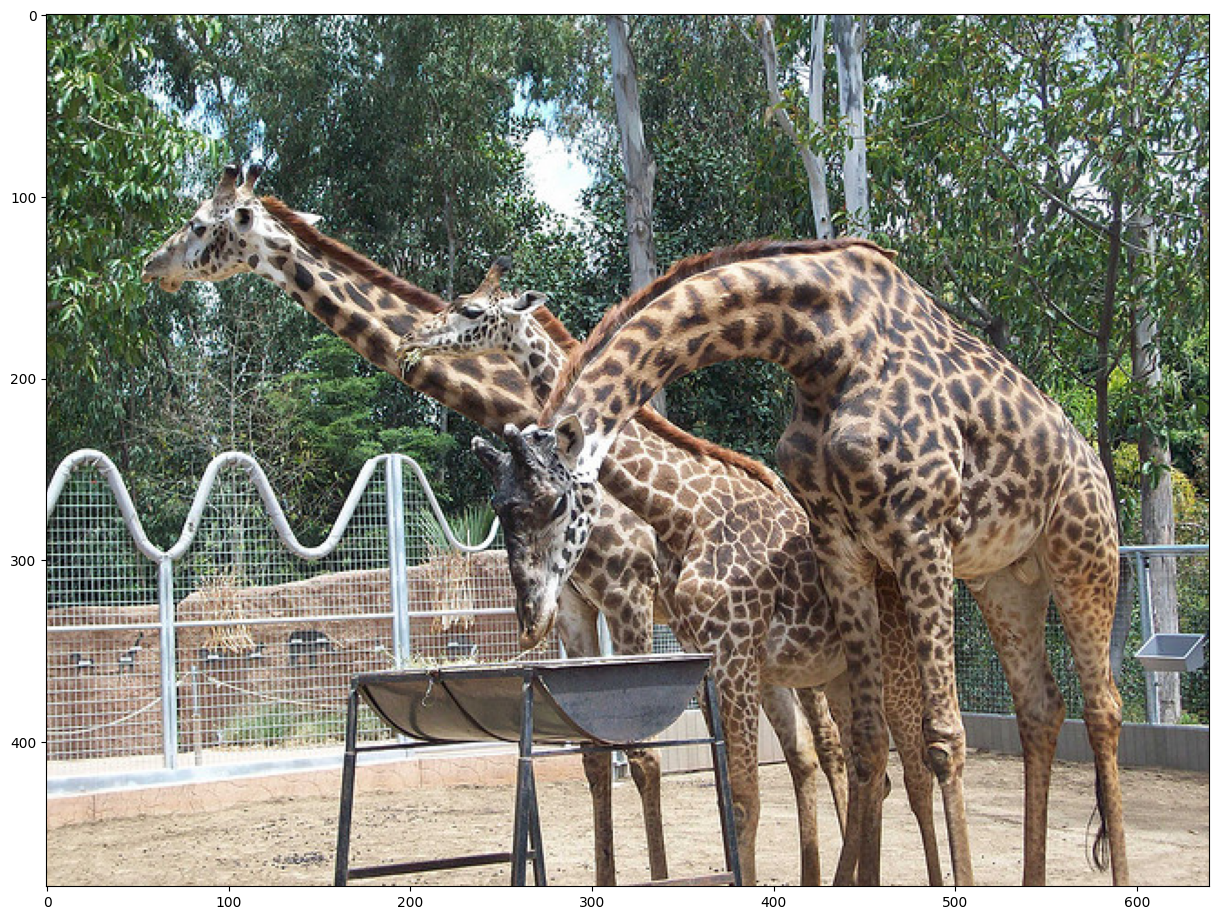

In [4]:
image_name = "./images/train2017/train2017/000000000144.jpg"

img =  Image.open(image_name)
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()

# Annotaion for image

In [5]:
image_ids_annotations = defaultdict(list)

path = './annotations/instances_train2017.json'
file = open(path)
anns = json.load(file)

for ann in anns['annotations']:
    image_id = ann['image_id']
    image_ids_annotations[image_id].append(ann)

In [6]:
from unicodedata import category


category_id_to_name = dict()
for ann in anns['categories']:
    category_id_to_name[ann['id']] = ann['name']

# Select one image and show annotations

COCO bbox format:
    x, y, h, w where:
        (x, y) is the coordinate of the top left corner of the box
        (w, h) is the width and height of the box

We have to transform it to an appropriate format

Matplotlib Python plots a rectangle with origin in top-left corner

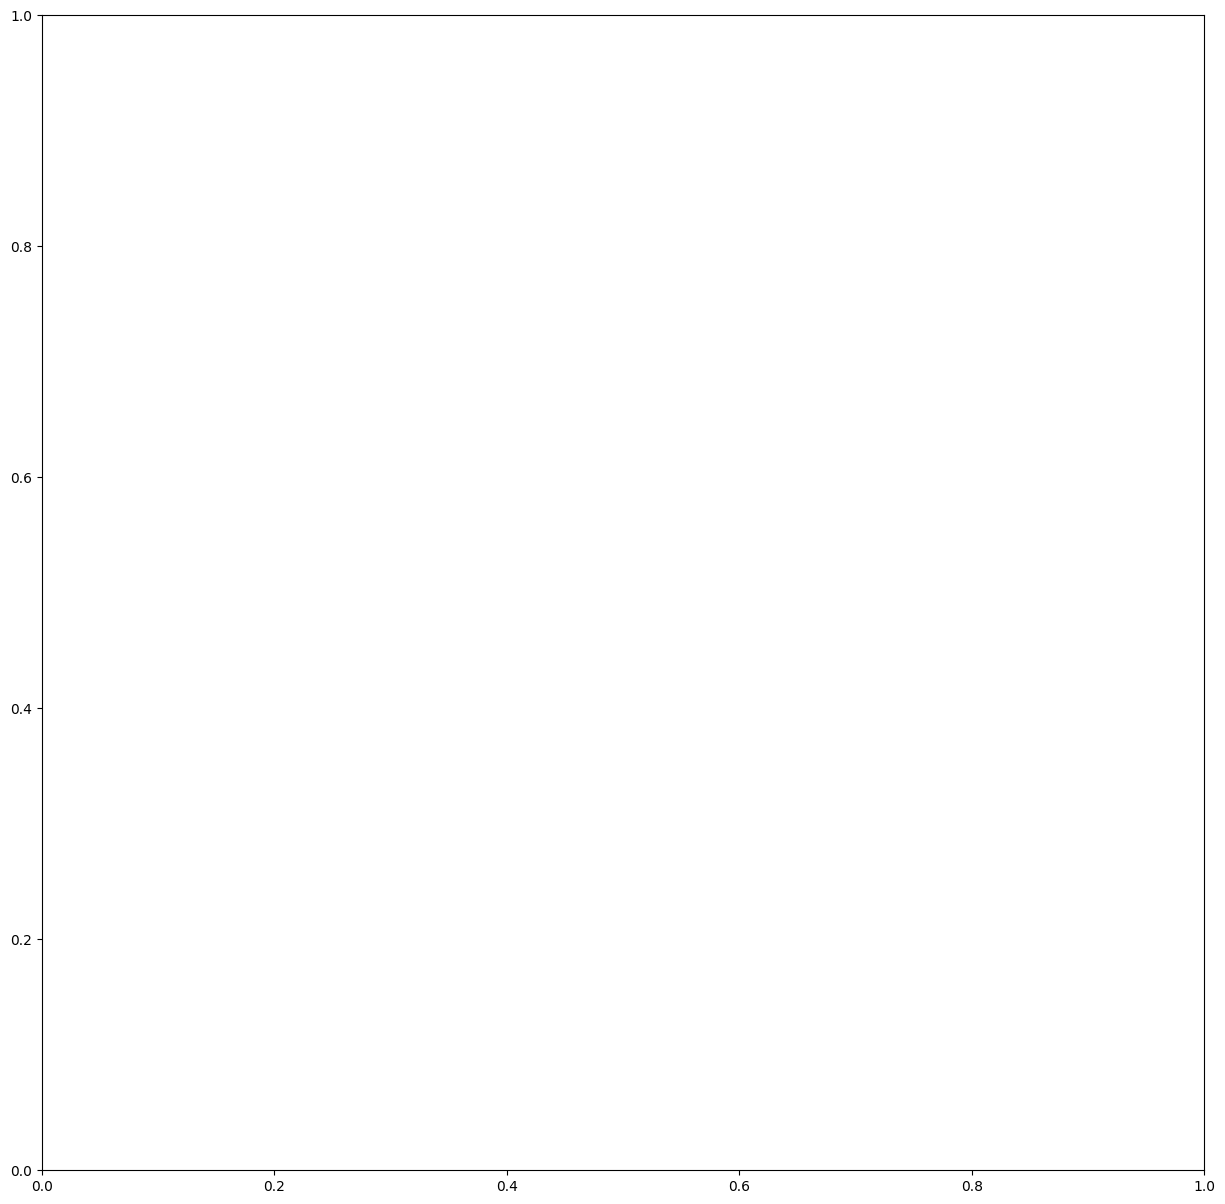

In [7]:
image_name = "./images/train2017/train2017/000000000144.jpg"
image_id = int(image_name.split("/")[-1].split(".")[0])

img = Image.open(image_name)
fig, ax = plt.subplots()

image_anns = image_ids_annotations[image_id]

for image_ann in image_anns:
    bbox = image_ann['bbox']
    name = category_id_to_name[image_ann['category_id']]

    x = float(bbox[0])
    y = float(bbox[1])
    w = float(bbox[2])
    h = float(bbox[3])

    plt.text(x+1, y-5, name, fontdict = {'fontsize': 18.0, 'fontweight':'medium','color': 'white', 'backgroundcolor': 'red'})
    bb = patches.Rectangle((x, y), w, h, linewidth = 2, edgecolor = 'red', facecolor = 'none')
    ax.add_patch(bb)

ax.imshow(img)
plt.show()